In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Automobile.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Utilizing Linear Regression with an 81% R Square value to
predict automobile prices :Implemented via Statsmodels and
Scikit-Learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
from scipy.stats import chi2_contingency
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df=pd.read_csv(path)
print(df.head())

   symboling  normalized_losses         make fuel_type aspiration  \
0          3                168  alfa-romero       gas        std   
1          3                168  alfa-romero       gas        std   
2          1                168  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  number_of_doors   body_style drive_wheels engine_location  wheel_base  ...  \
0             two  convertible          rwd           front        88.6  ...   
1             two  convertible          rwd           front        88.6  ...   
2             two    hatchback          rwd           front        94.5  ...   
3            four        sedan          fwd           front        99.8  ...   
4            four        sedan          4wd           front        99.4  ...   

   engine_size  fuel_system  bore  stroke compression_ratio horsepower  \
0          130         mpfi  3

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

In [ ]:
#number_of_doors and number_of_cylinders are of object datatype so lets convert them to int
print(df['number_of_doors'].value_counts())

four    114
two      87
Name: number_of_doors, dtype: int64


In [ ]:
x = {'two':'2','four':'4'}
df['number_of_doors'] = df['number_of_doors'].map(x)
# df.astype({'number_of_doors': 'int64'}).dtypes
print(df['number_of_doors'].value_counts())

4    114
2     87
Name: number_of_doors, dtype: int64


In [ ]:
print(df['number_of_cylinders'].value_counts())

four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: number_of_cylinders, dtype: int64


In [ ]:
x={'four':'4','six':'6','five':'5','two':'2','eight':'8','three':'3','twelve':'12'}
df['number_of_cylinders'] = df['number_of_cylinders'].map(x)
# df.astype({'number_of_cylinders': 'int64'}).dtypes
print(df['number_of_cylinders'].value_counts())

4     157
6      24
5      10
2       4
8       4
3       1
12      1
Name: number_of_cylinders, dtype: int64


In [ ]:
df[['number_of_doors', 'number_of_cylinders']] = df[['number_of_doors', 'number_of_cylinders']].apply(pd.to_numeric)

In [ ]:
#checking null values
def check_null(column_name):
  print(column_name,' ',df[column_name].isnull().sum())
for i in df.columns:
  check_null(i)

symboling   0
normalized_losses   0
make   0
fuel_type   0
aspiration   0
number_of_doors   0
body_style   0
drive_wheels   0
engine_location   0
wheel_base   0
length   0
width   0
height   0
curb_weight   0
engine_type   0
number_of_cylinders   0
engine_size   0
fuel_system   0
bore   0
stroke   0
compression_ratio   0
horsepower   0
peak_rpm   0
city_mpg   0
highway_mpg   0
price   0


In [ ]:
categorical_columns=[]
for i in df.columns:
  if df[i].dtype=='object':
    categorical_columns.append(i)
df_numeric=df.drop(categorical_columns,axis=1)
df_numeric=df_numeric.drop(['price'],axis=1)

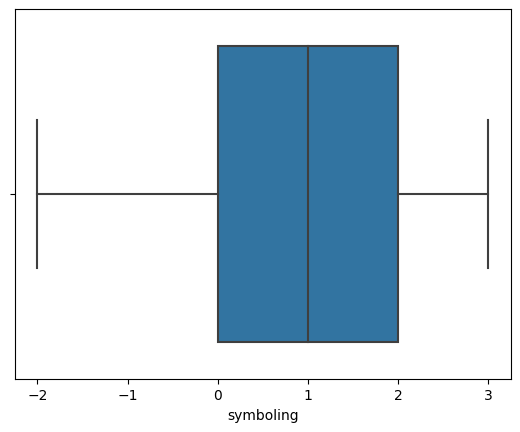

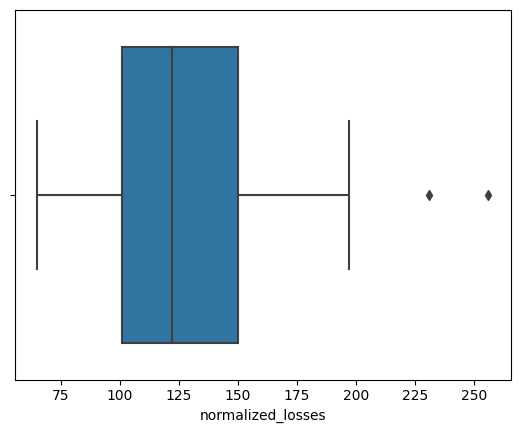

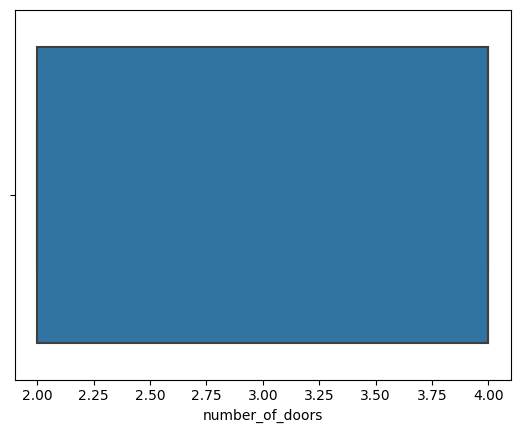

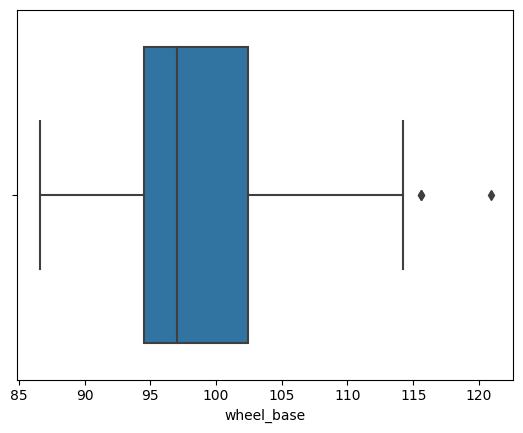

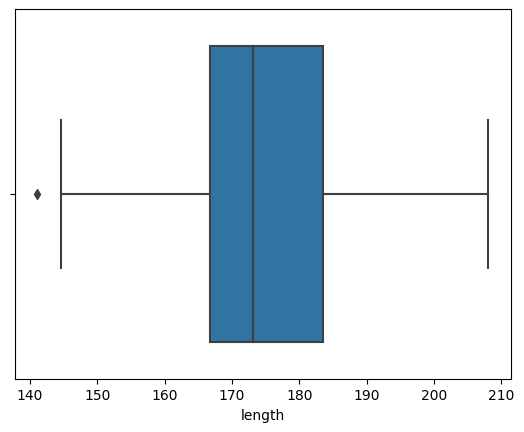

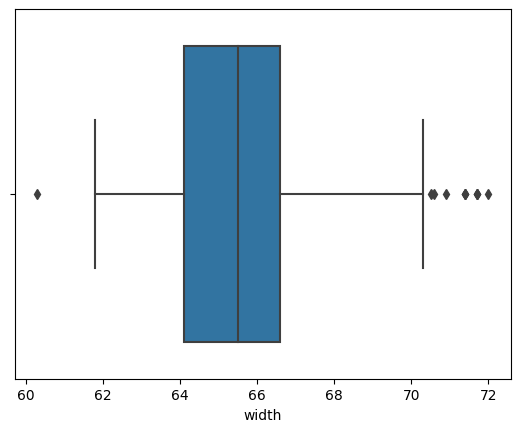

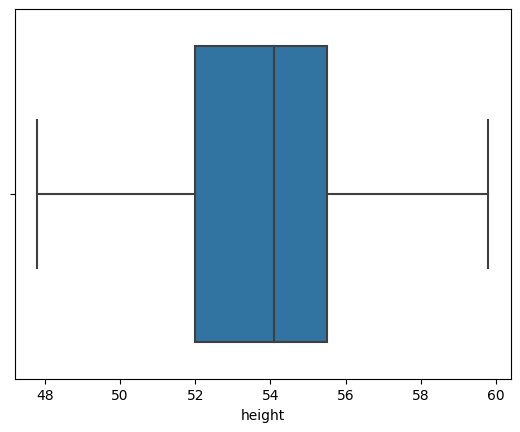

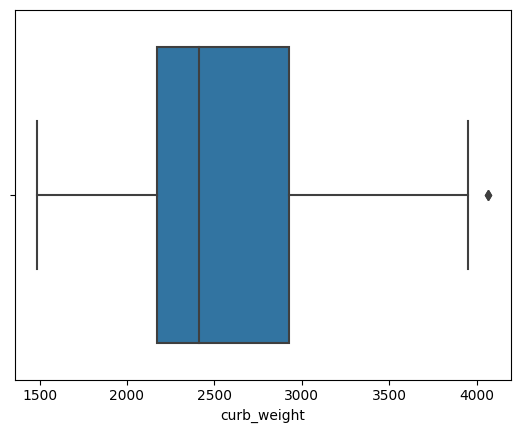

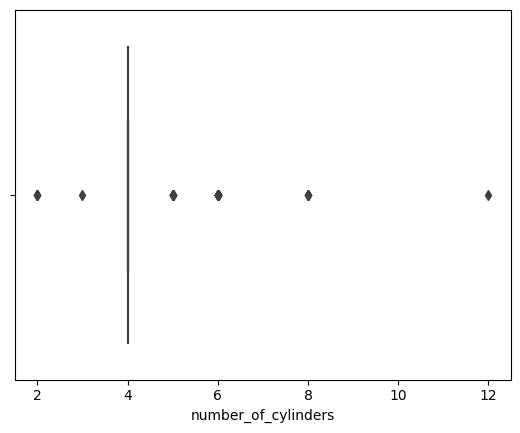

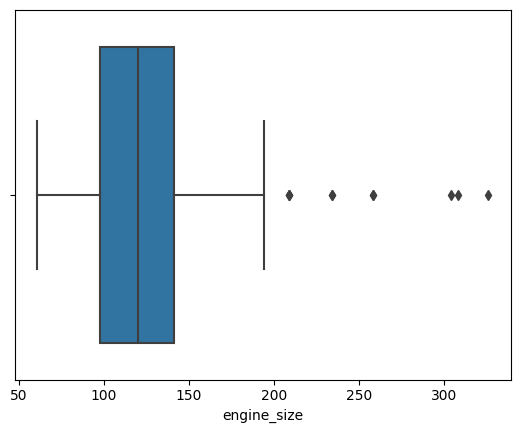

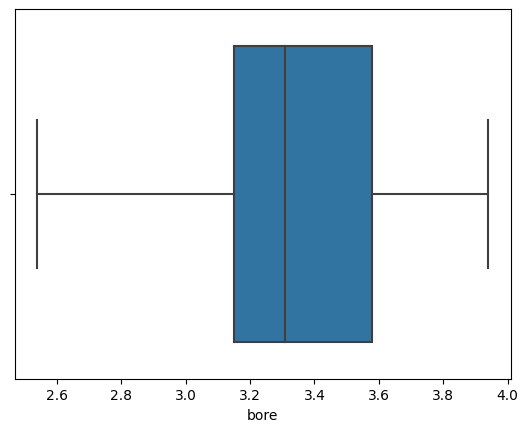

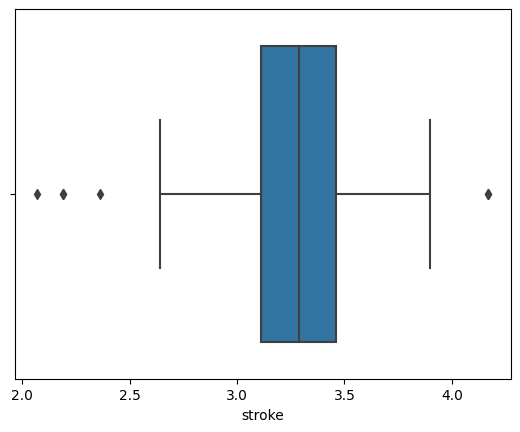

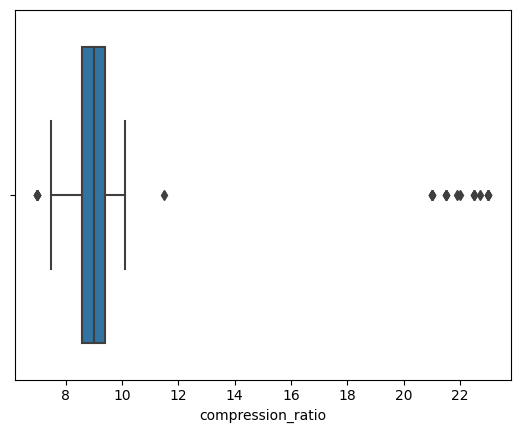

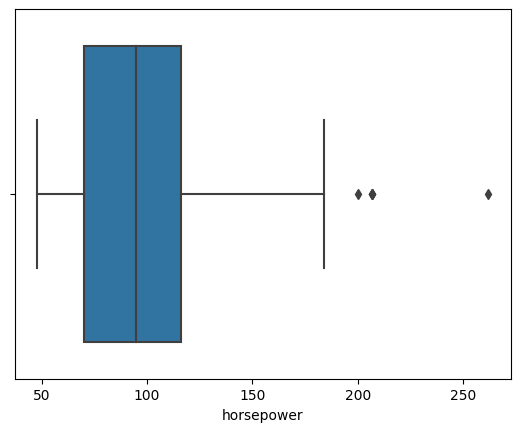

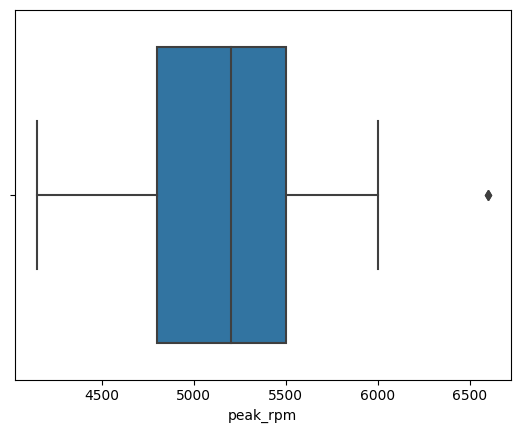

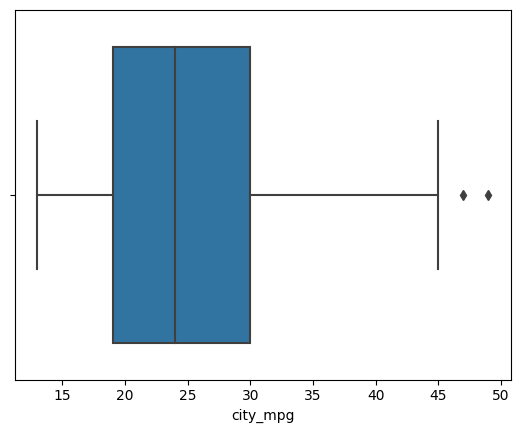

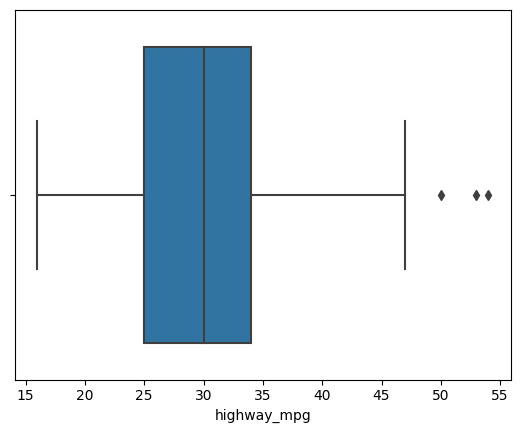

In [ ]:
def visualize_box_plot(column_name):
  sns.boxplot(data=df_numeric,x=df_numeric[column_name]);
  plt.show()
for i in df_numeric.columns:
  visualize_box_plot(i)

In [ ]:
def treat_outliers(column_name):
  q1=df_numeric[column_name].quantile(0.25)
  q3=df_numeric[column_name].quantile(0.75)
  iqr=q3-q1
  upper_lim=q3+1.5*iqr
  lower_lim=q1-1.5*iqr
  for i in df_numeric[column_name]:
    if i<lower_lim:
      df_numeric[column_name]=df_numeric[column_name].replace(i,lower_lim)
    elif i>upper_lim:
      df_numeric[column_name]=df_numeric[column_name].replace(i,upper_lim)

In [ ]:
for i in df_numeric.columns:
  treat_outliers(i)

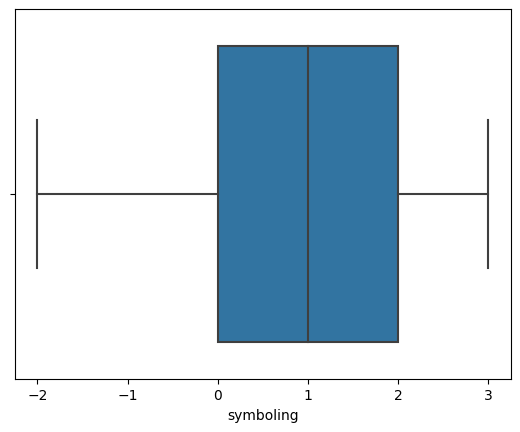

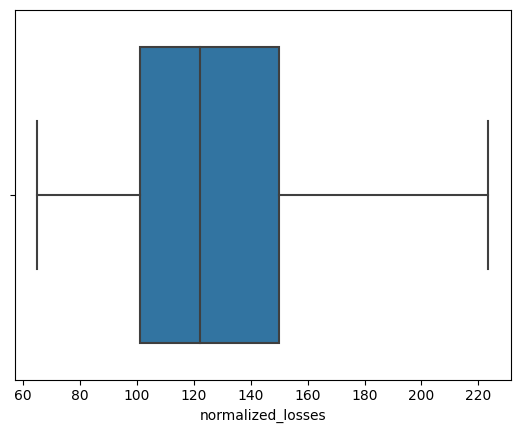

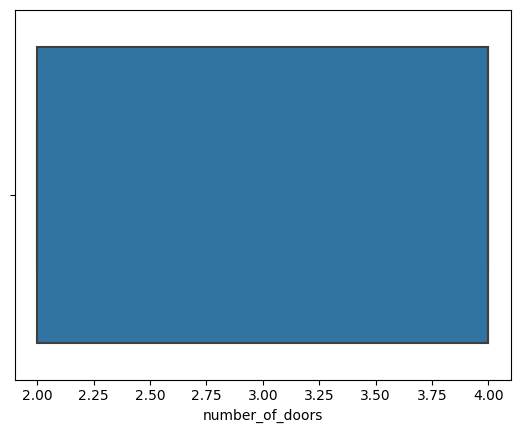

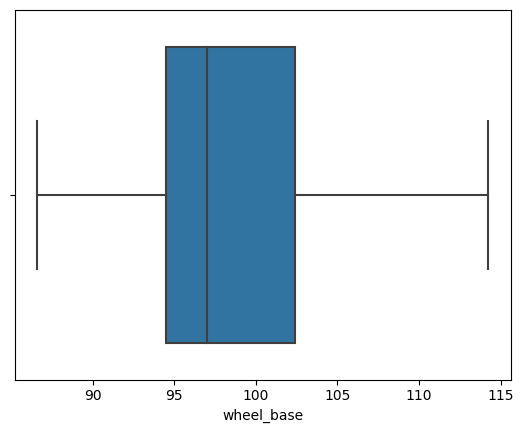

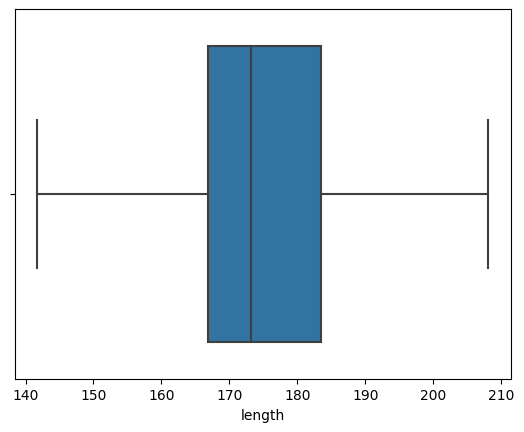

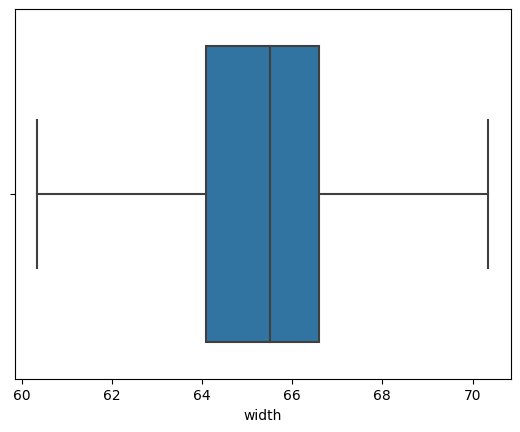

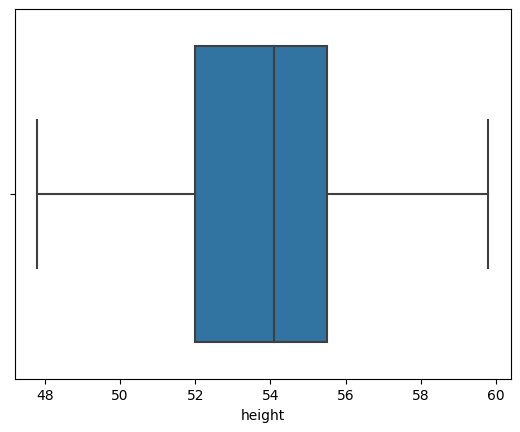

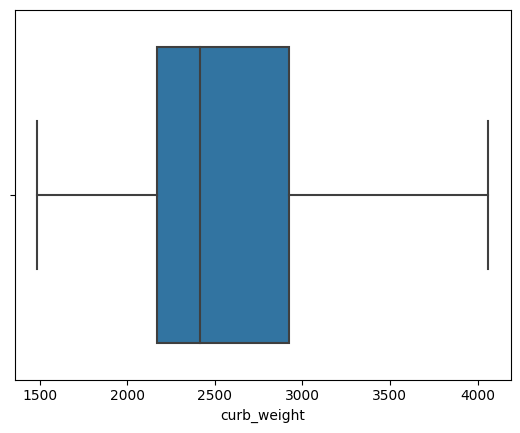

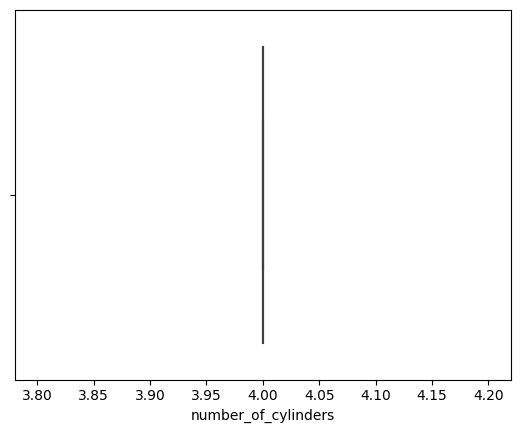

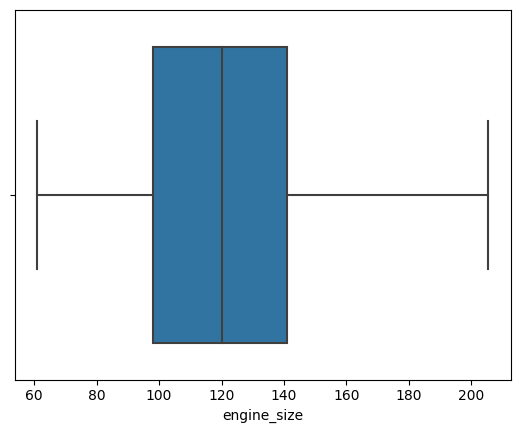

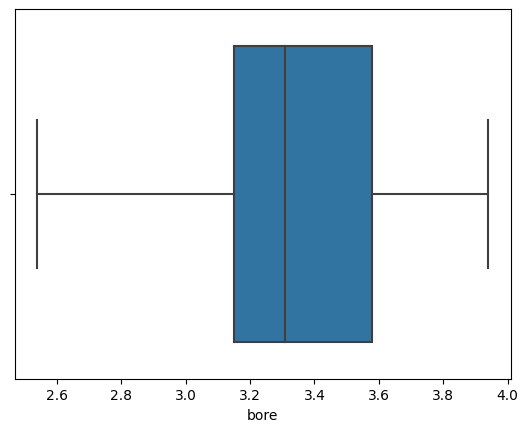

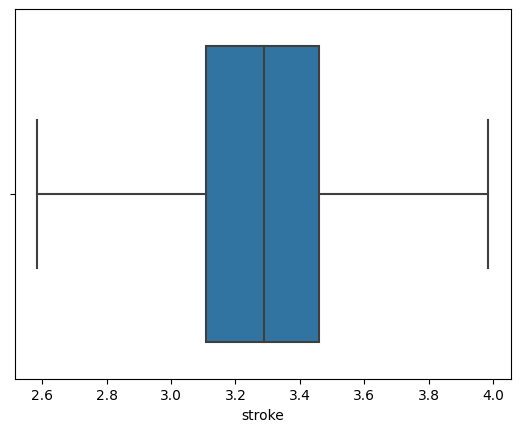

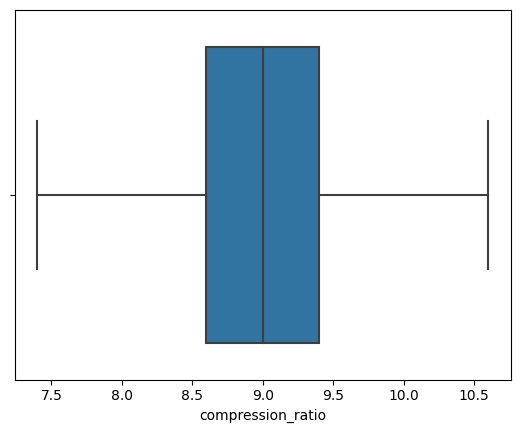

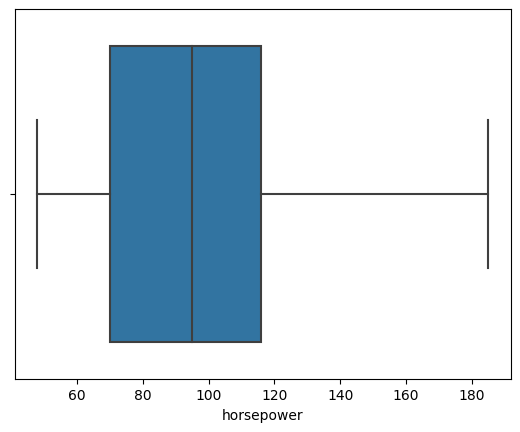

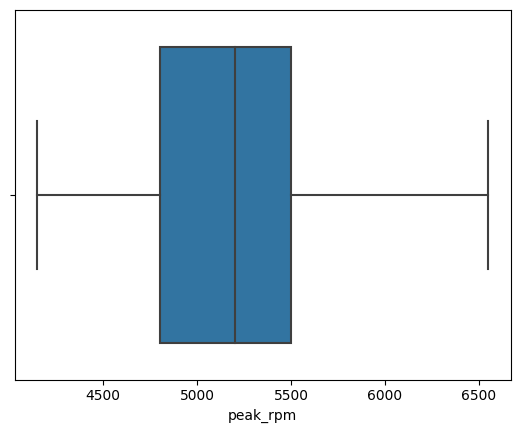

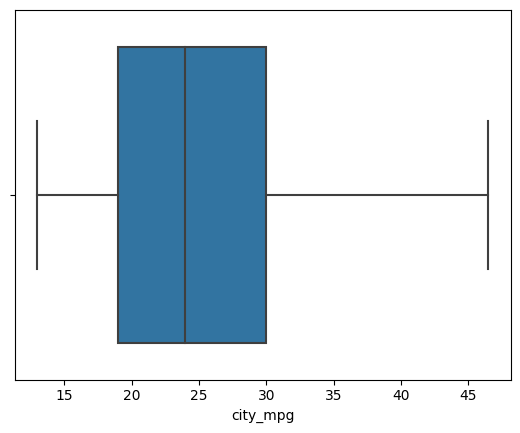

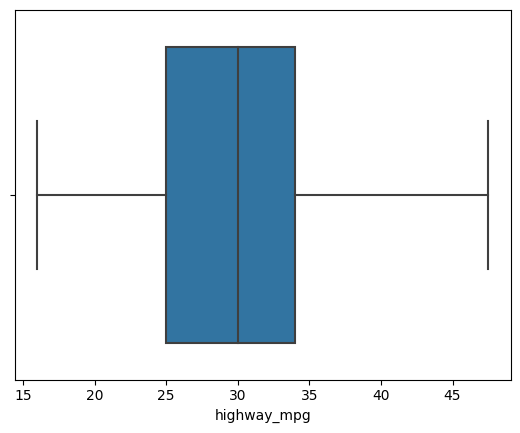

In [ ]:
for i in df_numeric.columns:
  visualize_box_plot(i)

In [ ]:
count=0
max_vif_column_name=''
max_vif=0
def calculate_vif(df_local):
  vif_data=pd.DataFrame(columns=['feature','VIF'])
  vif_data['feature']=df_local.columns
  vif_data['VIF']=[variance_inflation_factor(df_local.values, i)
                          for i in range(len(df_local.columns))]
  print(vif_data)
  return vif_data
vif_data=calculate_vif(df_numeric)
while len(df_numeric.columns)!=0:
  max_vif=max(list(vif_data['VIF']))
  for i in range(len(vif_data['feature'])):
    if vif_data['VIF'][i]<3:
      count+=1
    if vif_data['VIF'][i]==max_vif:
      max_vif_column_name=vif_data['feature'][i]
      # print(max_vif_column_name)
  if count==len(df_numeric.columns):
    print('Final Iteration:')
    print(vif_data)
    break
  else:
    df_numeric=df_numeric.drop(max_vif_column_name,axis=1)
    # print('df_numeric.columns:')
    # print(df_numeric.columns)
    count=0
    vif_data=calculate_vif(df_numeric)

                feature          VIF
0             symboling     3.183465
1     normalized_losses     1.871334
2       number_of_doors     2.388199
3            wheel_base     9.385528
4                length    10.489851
5                 width     6.225856
6                height     2.513644
7           curb_weight    15.688873
8   number_of_cylinders  5793.814708
9           engine_size     8.241110
10                 bore     2.252387
11               stroke     1.310215
12    compression_ratio     1.911568
13           horsepower     9.667371
14             peak_rpm     2.190413
15             city_mpg    21.843718
16          highway_mpg    22.145376
              feature          VIF
0           symboling     4.610203
1   normalized_losses    28.480849
2     number_of_doors    26.250244
3          wheel_base  2580.804686
4              length  2102.419534
5               width  3049.580813
6              height   994.781252
7         curb_weight   376.594028
8         engine_si

In [ ]:
y=df['price']

In [ ]:
drop_columns=[]
for i in df.columns:
  if df[i].dtype!='object':
    drop_columns.append(i)
df=df.drop(drop_columns,axis=1)
df_categorical=df

In [ ]:
df=pd.concat([df,df_numeric],axis=1)
print(df.head())

          make fuel_type aspiration   body_style drive_wheels engine_location  \
0  alfa-romero       gas        std  convertible          rwd           front   
1  alfa-romero       gas        std  convertible          rwd           front   
2  alfa-romero       gas        std    hatchback          rwd           front   
3         audi       gas        std        sedan          fwd           front   
4         audi       gas        std        sedan          4wd           front   

  engine_type fuel_system  symboling  city_mpg  
0        dohc        mpfi          3      21.0  
1        dohc        mpfi          3      21.0  
2        ohcv        mpfi          1      19.0  
3         ohc        mpfi          2      24.0  
4         ohc        mpfi          2      18.0  


In [ ]:
df=pd.get_dummies(df)
print(df.head())

   symboling  city_mpg  make_alfa-romero  make_audi  make_bmw  make_chevrolet  \
0          3      21.0                 1          0         0               0   
1          3      21.0                 1          0         0               0   
2          1      19.0                 1          0         0               0   
3          2      24.0                 0          1         0               0   
4          2      18.0                 0          1         0               0   

   make_dodge  make_honda  make_isuzu  make_jaguar  ...  engine_type_ohcv  \
0           0           0           0            0  ...                 0   
1           0           0           0            0  ...                 0   
2           0           0           0            0  ...                 1   
3           0           0           0            0  ...                 0   
4           0           0           0            0  ...                 0   

   engine_type_rotor  fuel_system_1bbl  fuel_syste

In [ ]:
X=df
print(X.head())

   symboling  city_mpg  make_alfa-romero  make_audi  make_bmw  make_chevrolet  \
0          3      21.0                 1          0         0               0   
1          3      21.0                 1          0         0               0   
2          1      19.0                 1          0         0               0   
3          2      24.0                 0          1         0               0   
4          2      18.0                 0          1         0               0   

   make_dodge  make_honda  make_isuzu  make_jaguar  ...  engine_type_ohcv  \
0           0           0           0            0  ...                 0   
1           0           0           0            0  ...                 0   
2           0           0           0            0  ...                 1   
3           0           0           0            0  ...                 0   
4           0           0           0            0  ...                 0   

   engine_type_rotor  fuel_system_1bbl  fuel_syste

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
reg = LinearRegression()
# train the model using the training sets
reg.fit(X_train, y_train)
print('Coefficients: ', reg.coef_)
print('Intercept: ',reg.intercept_)

# R square
print(' In Sample R Square: {}'.format(reg.score(X_train, y_train)))
y_pred=reg.predict(X_train)
# print("Y Predictions: ",y_pred)

Coefficients:  [-5.49244845e+02 -3.07154894e+02 -6.21921958e+03  5.33143342e+03
  5.30888531e+03 -1.37831345e+03 -3.85126560e+03 -5.62378001e+02
 -8.09934095e+03  1.32727242e+04 -1.58251721e+03  1.26846416e+04
 -9.16315912e-11 -2.92952445e+03 -3.21510444e+03 -1.72601876e+03
 -3.29075170e+03  6.93610615e+03 -2.57152187e+03  1.16570642e+03
 -4.63349129e+03 -3.21309491e+03 -1.60753911e+03  1.80584244e+02
  1.09195735e+03 -1.09195735e+03 -6.68624539e+02  6.68624539e+02
  3.57310499e+03 -2.24048733e+02 -8.43245765e+02 -8.71182712e+02
 -1.63462778e+03 -7.68154144e+02 -8.10698474e+02  1.57885262e+03
 -4.23515804e+03  4.23515804e+03  4.25428139e+02 -1.72601876e+03
 -1.90735662e+03 -3.98333247e+02  4.28947843e+03 -6.83197939e+02
 -8.20865116e+02  7.31023652e+02 -1.58024544e+03  1.09195735e+03
  0.00000000e+00  1.01259967e+03 -4.34470118e+02  0.00000000e+00]
Intercept:  28720.461402691246
 In Sample R Square: 0.9329112452786955


In [ ]:
y_pred_test=reg.predict(X_test)
print('Out Sample R Square ',reg.score(X_test,y_test))

Out Sample R Square  0.8146931199133715


In [ ]:
#Huge difference between Training and Testiing R Square hence the model is overfit
sm_training_model_score=0
def training_OLS(X_train_local):
  X_train_local=sm.add_constant(X_train_local)
  result=sm.OLS(y_train,X_train_local).fit()
  global sm_training_model_score
  sm_training_model_score=result.rsquared
  return result.pvalues[1:]

In [ ]:
alpha=0.05
p_values=training_OLS(X_train)
count=0
drop_columns=[]
while len(X_train.columns)>0:
  for i in range(0,len(p_values)):
    if p_values[i]>alpha:
      drop_columns.append(X_train.columns[i])
      count+=1
  if count==0:
    break
  else:
    X_train=X_train.drop(drop_columns,axis=1)
    count=0
    drop_columns=[]
    p_values=training_OLS(X_train)
print('In Sample R Square after dropping insignificant columns through statsmodel: ',sm_training_model_score)

In Sample R Square after dropping insignificant columns through statsmodel:  0.8913649085295723


In [ ]:
#Now lets run sklearn on the modified X_train and original X_test
reg=LinearRegression()
reg.fit(X_train,y_train)
print('Final In Sample R Square: ',reg.score(X_train,y_train))

Final In Sample R Square:  0.8913649085295722


In [ ]:
count=0
for i in X_test.columns:
  count=0
  for j in X_train.columns:
    if i==j:
      count+=1
  if count==0:
    X_test=X_test.drop(i,axis=1)

In [ ]:
print('Final Out Sample R Square: ',reg.score(X_test,y_test))

Final Out Sample R Square:  0.8158856827251182
